## **IMPORTS**

In [41]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2

In [28]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(
    "../data/Training and Validation/",
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(
    "../data/Testing/",
    target_size=(150,150),
    batch_size =32,
    class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


## **FUNCTIONS**

In [29]:
def predictImage(filename: str) -> any:
    img1 = image.load_img(filename,target_size=(150,150))
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    plt.imshow(img1)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

## **DATA PRE-PROCESSING**

#### Balancing Dataset

In [50]:
pd.DataFrame(data={"Class":train_dataset.classes})['Class'].value_counts()

Class
0    928
1    904
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ef845590f0>,
 [Text(-0.022634243939995354, 1.0997671076192745, 'Fire'),
  Text(0.022634140972367364, -1.0997671097384405, 'No Fire')])

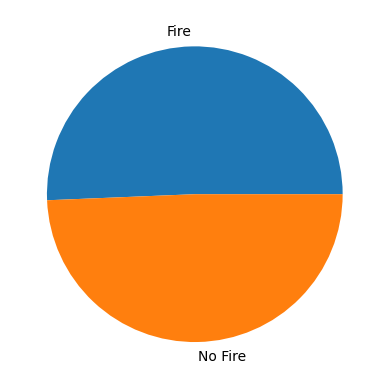

In [48]:
plt.title()
plt.pie(
    x=pd.DataFrame(data={"Class":train_dataset.classes})['Class'].value_counts(),
    labels={"Fire": "Fire", "No Fire":"No Fire"}
)

## **MODEL BUILDING - CONVOLUTIONAL NEURAL NETWORK**

In [30]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

#### Model compile

In [31]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#### Model fit

In [32]:
r = model.fit(
    x=train_dataset,
    epochs=10,
    validation_data=test_dataset
)

Epoch 1/10
58/58 [==============================] - 19s 303ms/step - loss: 0.2507 - accuracy: 0.9105 - val_loss: 0.2730 - val_accuracy: 0.9118
Epoch 2/10
58/58 [==============================] - 17s 285ms/step - loss: 0.2030 - accuracy: 0.9285 - val_loss: 0.5496 - val_accuracy: 0.7941
Epoch 3/10
58/58 [==============================] - 18s 305ms/step - loss: 0.1474 - accuracy: 0.9520 - val_loss: 0.3699 - val_accuracy: 0.8971
Epoch 4/10
58/58 [==============================] - 17s 295ms/step - loss: 0.1270 - accuracy: 0.9591 - val_loss: 0.1781 - val_accuracy: 0.9265
Epoch 5/10
58/58 [==============================] - 17s 295ms/step - loss: 0.1181 - accuracy: 0.9623 - val_loss: 0.6079 - val_accuracy: 0.8235
Epoch 6/10
58/58 [==============================] - 17s 299ms/step - loss: 0.1106 - accuracy: 0.9694 - val_loss: 0.1296 - val_accuracy: 0.9412
Epoch 7/10
58/58 [==============================] - 16s 274ms/step - loss: 0.0732 - accuracy: 0.9754 - val_loss: 0.1578 - val_accuracy: 0.9265

## **INFERENCE MODEL**

In [33]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 41ms/step


## **MODEL VALIDATION**

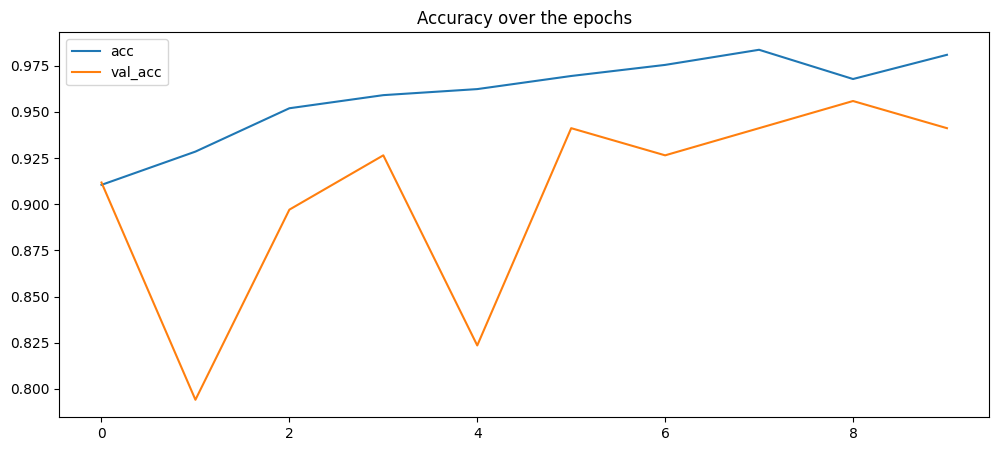

In [34]:
plt.figure(figsize=(12,5))
plt.title("Accuracy over the epochs")
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

1/1 [==============================] - 0s 99ms/step
[[0.]]


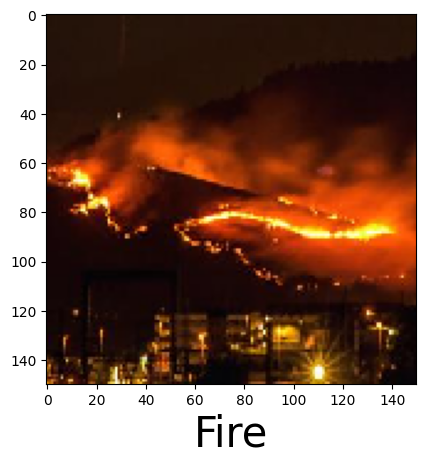

In [35]:
predictImage("../data/Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 37ms/step
[[1.]]


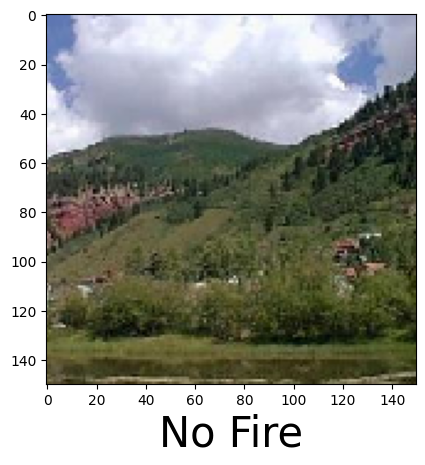

In [36]:
predictImage('../data/Testing/nofire/abc346.jpg')

## **CONCLUSION**

- Model is well performing in testing.
- The model can be improved further more as the graphs showing accuracy and loss are bit messy.